# Interpolation

In [1]:
import numpy as np
import scipy.interpolate as interp
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

### Piece-wise linear interpolation:

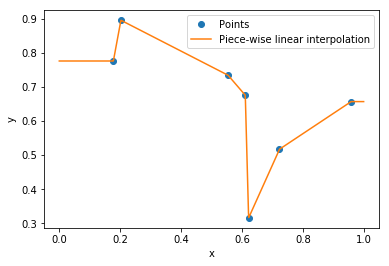

In [2]:
# consider a set of random points
x_p = np.random.rand(7)
y_p = np.random.rand(7)

x_p.sort()
x = np.linspace(0.0, 1.0, 1000)

linear = np.zeros(x.shape)
for n in range(1, len(x_p)):
    linear += (y_p[n-1] + (y_p[n] - y_p[n-1]) / (x_p[n] - x_p[n-1]) * (x - x_p[n-1])) * (x > x_p[n-1]) * (x <= x_p[n])

# add end points for continuity
linear += np.ones(x.shape) * y_p[0] * (x < x_p[0])
linear += np.ones(x.shape) * y_p[-1] * (x >= x_p[-1])

# plot results
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_p, y_p, 'o', label="Points")
ax.plot(x, linear, '-', label="Piece-wise linear interpolation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### Lagrange interpolation:

In [3]:
def lagrange_interpolation(x, y):
    """
    Calculates a Lagrange interpolating polynomial.
    Args:
        x (array_like): X-coordinates of a set of datapoints
        y (array_like): Y-coordinates of a set of datapoints
    Returns:
        numpy.poly1d: The Lagrange interpolating polynomial
    """
    n = len(x)
    L = np.poly1d(0)
    for i in range(n):
        F = np.poly1d(1)
        for j in range(n):
            if j == i:
                continue
            F *= np.poly1d([1., -x[j]]) / (x[i] - x[j])
        L += y[i] * F
    return L

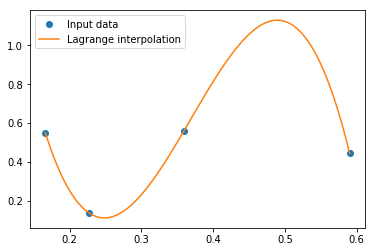

In [28]:
# test of the lagrange_interpolation function

# consider a set of random points
x_p = np.random.rand(4)
y_p = np.random.rand(4)

# find lagrange interpolating polynomial
f = lagrange_interpolation(x_p, y_p)
x = np.linspace(np.min(x_p), np.max(x_p), 100)
#print(f)

# create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_p, y_p, 'o', label="Input data") # plot the discrete data
ax.plot(x, f(x), '-', label="Lagrange interpolation") # plot the lagrange polynomial
ax.legend()

        7         6         5         4         3         2
-1.936 x + 1.851 x + 3.554 x - 3.281 x - 2.463 x + 2.644 x - 0.3305 x + 0.3292


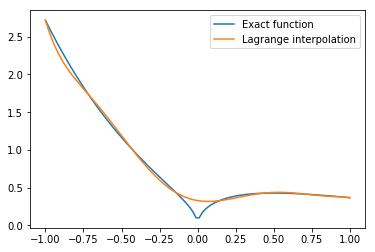

In [9]:
# test of the lagrange_interpolation function

# consider a function to be interpolated
def func(x):
    return np.exp(-x) * np.sqrt(abs(x))

# interpolate the function on interval [-1, 1] with 8 equidistant steps
x_p = np.linspace(-1., 1., 8)
y_p = func(x_p)

# find lagrange interpolating polynomial
f = lagrange_interpolation(x_p, y_p)
x = np.linspace(np.min(x_p), np.max(x_p), 100)
print(f)

# create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, func(x), '-', label="Exact function") # plot the discrete data
ax.plot(x, f(x), '-', label="Lagrange interpolation") # plot the lagrange polynomial
ax.legend()

### Neville's algorithm:

In [50]:
def neville_algorithm(x, y):
    """
    Calculates a Lagrange interpolating polynomial using Neville's algorithm.
    Args:
        x (array_like): X-coordinates of a set of datapoints
        y (array_like): Y-coordinates of a set of datapoints
    Returns:
        numpy.poly1d: The Lagrange interpolating polynomial
    """
    n = len(x) # get the size of data
    L = [[0 for _ in range(n)] for _ in range(n)] # initialize empty list of polynomials
    for i in range(n):      
        L[i][i] = np.poly1d(y[i])
    k = 1
    while k < n:
        for i in range(n - k):
            j = i + k
            L[i][j] = (np.poly1d([1., -x[j]]) * L[i][j-1] - np.poly1d([1., -x[i]]) * L[i+1][j]) / (x[i] - x[j]) 
        k = k + 1
    return L[0][n-1] # return Lagrange polynomial

       4         3         2
35.58 x - 71.86 x + 42.03 x - 6.553 x + 0.3366


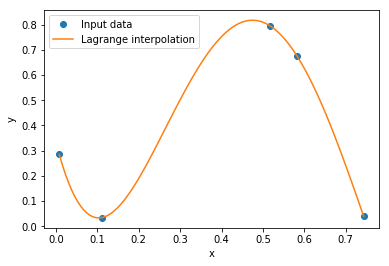

In [51]:
# test of the neville_algorithm function

# consider a set of random points
x_p = np.random.rand(5)
y_p = np.random.rand(5)

# find lagrange interpolating polynomial
f = neville_algorithm(x_p, y_p)
x = np.linspace(np.min(x_p), np.max(x_p), 100)
print(f)

# plot results
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_p, y_p, 'o', label="Input data") # plot the discrete data
ax.plot(x, f(x), '-', label="Lagrange interpolation") # plot the lagrange polynomial
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

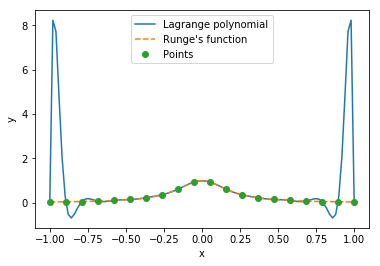

In [12]:
# Runge's function
def func(x):
    return 1.0 / (1.0 + 25.0 * x**2)

x = np.linspace(-1, 1, 100)

# consider a set of points in which the function is evaluated
x_p = np.linspace(-1, 1, 20)
y_p = func(x_p)

# find Lagrange interpolating polynomial
f_interp = lagrange_interpolation(x_p, y_p)
    
# plot results
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, f_interp(x), '-', label="Lagrange polynomial")
ax.plot(x, func(x), '--', label="Runge's function")
ax.plot(x_p, y_p, 'o', label="Points")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### Newton interpolation:

In [13]:
def newton_interpolation(x, y):
    # add code
    return

### Chebyshev interpolation:

In [38]:
def chebyshev_polynomial_rec(n):
    """
    Calculates a Chebyshev polynomial of degree n using recursive formula.
    Args:
        n (int): Degree of the polynomial
    Returns:
        numpy.poly1d: The Chebyshev polynomial of degree n
    """
    if n < 0:
        print("error: n must be equal or greater than 0")
        return
    T = [0 for i in range(n+1)]
    for i in range(n+1):
        if i == 0:
            T[i] = np.poly1d(1)
        elif i == 1:
            T[i] = np.poly1d([1, 0])
        else:
            T[i] = 2 * np.poly1d([1, 0]) * T[i-1] - T[i-2]
    return T[n]

In [39]:
def chebyshev_polynomial(n, x):
    """
    Calculates a Chebyshev polynomial of degree n (only for abs(x) <= 1).
    Args:
        n (int): Degree of the polynomial
        x (array_like): coordinates on which the polynomial is evaluated
    Returns:
        numpy.ndarray: The Chebyshev polynomial of degree n
    """
    return np.cos(n * np.arccos(x))

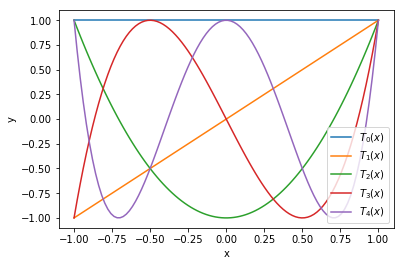

In [67]:
# test of the chebyshev_polynomial_rec function

x = np.linspace(-1, 1, 100)

# plot Chebyshev polynomials
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(5):
    T = chebyshev_polynomial_rec(i)
    ax.plot(x, T(x), label="$T_{} (x)$".format(i))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [57]:
def chebyshev_roots(n):
    roots = np.zeros(n)
    for k in range(n):
        roots[k] = -np.cos(np.pi * (k + 0.5) / n)
    return roots

In [66]:
print(np.polynomial.Chebyshev.basis(4).roots())
print(chebyshev_roots(4))

[-0.92387953 -0.38268343  0.38268343  0.92387953]
[-0.92387953 -0.38268343  0.38268343  0.92387953]


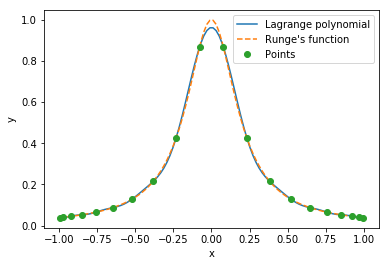

In [65]:
# Runge's function
def func(x):
    return 1.0 / (1.0 + 25.0 * x**2)

x = np.linspace(-1, 1, 100)

# function is evaluated at roots of Chebyshev polynomial
x_p = chebyshev_roots(20)
y_p = func(x_p)

# find Lagrange interpolating polynomial
f_interp = lagrange_interpolation(x_p, y_p)
    
# plot results
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, f_interp(x), '-', label="Lagrange polynomial")
ax.plot(x, func(x), '--', label="Runge's function")
ax.plot(x_p, y_p, 'o', label="Points")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### Cubic spline Interpolation:

In [68]:
def cubic_spline_interpolation(x, y):
    der = np.zeros(n)
    spline = 
    return 

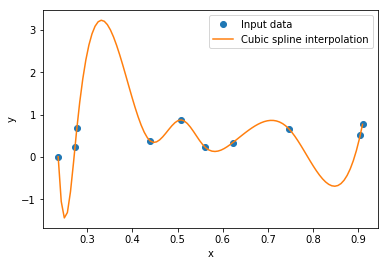

In [74]:
# test of the cubic spline interpolation

# consider a set of random points
x_p = np.random.rand(10)
y_p = np.random.rand(10)

x_p.sort()

# find lagrange interpolating polynomial
f = interp.CubicSpline(x_p, y_p)
x = np.linspace(np.min(x_p), np.max(x_p), 100)

# plot results
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_p, y_p, 'o', label="Input data") # plot the discrete data
ax.plot(x, f(x), '-', label="Cubic spline interpolation") # plot cubic spline interpolation 
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### Least squares interpolation:

In [77]:
def linear_least_squares(x, y):
    """
    Calculates the linear least squares polynomial fit.
    Args:
        x (array_like): X-coordinates of a set of datapoints
        y (array_like): Y-coordinates of a set of datapoints
    Returns:
        numpy.poly1d: The linear least squares polynomial
    """
    S0 = np.sum(x**0)
    S1 = np.sum(x**1)
    S2 = np.sum(x**2)
    T0 = np.sum(y*x**0)
    T1 = np.sum(y*x**1)
    a0 = (S2*T0 - S1*T1) / (S0*S2 - S1**2)
    a1 = (S0*T1 - S1*T0) / (S0*S2 - S1**2)
    matrix = np.array([[S0, S1], [S1, S2]])
    rhs = np.array([T0, T1])
    a = la.solve(matrix, rhs)
    return np.poly1d([a1, a0])

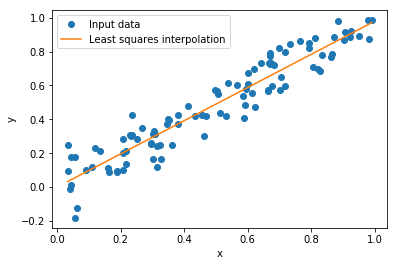

In [80]:
# test of the linear_least_squares function

# consider data with Gaussian noise
x_p = np.random.rand(100)
y_p = x_p + 0.1 * np.random.normal(size=100)

x = np.linspace(np.min(x_p), np.max(x_p), 100)

# find least squares interpolation
f = linear_least_squares(x_p, y_p)
#a1, a0 = np.polyfit(x_p, y_p, 1)
#f2 = np.poly1d([a1, a0])

# plot results
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_p, y_p, 'o', label="Input data") # plot the discrete data
ax.plot(x, f(x), '-', label="Least squares interpolation") # plot least squares interpolation 
#ax.plot(x, f2(x), '--', label="Numpy least squares interpolation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [2]:
def quadratic_least_squares(x, y):
    """
    Calculates the quadratic least squares polynomial fit.
    Args:
        x (array_like): X-coordinates of a set of datapoints
        y (array_like): Y-coordinates of a set of datapoints
    Returns:
        numpy.poly1d: The quadratic least squares polynomial
    """
    S0 = np.sum(x**0)
    S1 = np.sum(x**1)
    S2 = np.sum(x**2)
    S3 = np.sum(x**3)
    S4 = np.sum(x**4)
    T0 = np.sum(y*x**0)
    T1 = np.sum(y*x**1)
    T2 = np.sum(y*x**2)
    matrix = np.array([[S0, S1, S2], [S1, S2, S3], [S2, S3, S4]])
    rhs = np.array([T0, T1, T2])
    a = la.solve(matrix, rhs)
    return np.poly1d([a[2], a[1], a[0]])

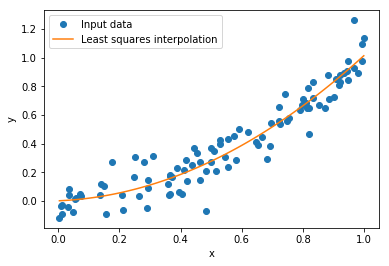

In [3]:
# test of the quadratic_least_squares function

# consider data with Gaussian noise
x_p = np.random.rand(100)
y_p = x_p**2 + 0.1 * np.random.normal(size=100)

x = np.linspace(np.min(x_p), np.max(x_p), 100)

# find least squares interpolation
f = quadratic_least_squares(x_p, y_p)
#a2, a1, a0 = np.polyfit(x_p, y_p, 2)
#f2 = np.poly1d([a2, a1, a0])

# plot results
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_p, y_p, 'o', label="Input data") # plot the discrete data
ax.plot(x, f(x), '-', label="Least squares interpolation") # plot least squares interpolation 
#ax.plot(x, f2(x), '--', label="Numpy least squares interpolation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()